# Exercise 6.5 - TASK 

#### 1. Importing libraries and dataset
#### 2. Data wrangling to prep for analysis
#### 3. The elbow technique
#### 4. k-means clustering

## 01. Importing libraries and dataset

In [1]:
# Importing our libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [2]:
# Set max_columns to None to display all columns
pd.set_option('display.max_columns', None)

In [3]:
# Creating the default 'path' for easier reference
path = r'C:\Users\peter\Desktop\Career Foundry - Data Analyst\Data Immersion\Achievement 6 - Advanced Analytics\Achievement 6 - Project'

In [4]:
# Importing the listings dataset
df = pd.read_pickle(os.path.join(path, '02. Data\Modified\listings_clean.pkl'))

In [5]:
df.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,360.0,666,2008-07-08,"Denver, CO",within an hour,100%,96%,t,Highland,4,4,"Denver, Colorado, United States",Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,136.0,30,60,30,30,60,60,30.0,60.0,t,0,23,53,143,178,8,1,2018-08-13,2023-06-16,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2.99
1,364.0,783,2008-07-11,"Denver, CO",nan,nan,nan,f,Five Points,1,1,"Denver, Colorado, United States",Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,179.0,185,365,185,185,365,365,185.0,365.0,t,23,53,83,358,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,0.51
2,590.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,"Denver, Colorado, United States",North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,1 shared bath,NaN,1.0,84.0,1,300,1,1,300,300,1.0,300.0,t,15,45,63,242,702,48,7,2009-03-29,2023-06-24,4.85,4.79,4.58,4.93,4.95,4.75,4.86,4.04
3,592.0,933,2008-07-21,"Denver, CO",within an hour,100%,97%,nan,North Park Hill,2,2,nan,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,1 shared bath,NaN,1.0,65.0,28,365,28,28,365,365,28.0,365.0,t,8,8,8,174,168,1,1,2009-02-21,2023-06-24,4.87,4.75,4.55,4.94,4.94,4.81,4.86,0.96
4,1940.0,2150,2008-08-16,"Denver, CO",within an hour,100%,100%,t,Baker,1,1,"Denver, Colorado, United States",Baker,39.720486,-104.997520,Entire guesthouse,Entire home/apt,2,1 bath,NaN,1.0,111.0,1,120,1,1,1125,1125,1.0,1125.0,t,6,22,44,129,132,35,2,2017-01-24,2023-06-04,4.95,4.94,4.97,4.98,4.98,4.91,4.86,1.69


## 02. Wrangling the data 

In [6]:
# Creating a list then subset to include only the columns to analyze with our clustering algorithim
df_wrangle = ['price','accommodates','beds','review_scores_rating']

In [7]:
# Creating the subset dataframe
df2 = df[df_wrangle]

In [8]:
df2.head()

,price,accommodates,beds,review_scores_rating
0,136.0,3,2.0,4.99
1,179.0,3,1.0,4.85
2,84.0,3,1.0,4.85
3,65.0,2,1.0,4.87
4,111.0,2,1.0,4.95


In [9]:
df2.shape

(5378, 4)

In [10]:
# Checking for null values in all columns
null_value_counts = df2.isnull().sum()
print(null_value_counts)

price                     0
accommodates              0
beds                     42
review_scores_rating    858
dtype: int64


In [11]:
# Removing the listings with a price < 10000 and > 0.
df2 = df2[(df2['price'] <10000) & (df2['price'] >0)]
df2.shape

(5367, 4)

In [12]:
# Removing the listings that have a null value for # of beds
df2 = df2[df2['beds'].notna()]
df2.shape

(5326, 4)

In [13]:
# Checkign the mean value to see if it makes sense to replace the NaN values with 
mean_value = df2['review_scores_rating'].mean()
mean_value

4.82710426434472

In [14]:
# Changing all of the null review scores to the mean value for the purposes of this analysis
df2['review_scores_rating'] = df2['review_scores_rating'].fillna(mean_value)

In [15]:
# Checking for null values in all columns
df2.isnull().sum()

price                   0
accommodates            0
beds                    0
review_scores_rating    0
dtype: int64

In [16]:
# Creating another subset for listings that have a price < 4000
df3 = df2[(df2['price'] <4000) & (df2['price'] >0)]

# Removing the listings that have a null value for # of beds
df3 = df3[df3['beds'].notna()]

In [17]:
# Checking for null values in all columns
df3.isnull().sum()

price                   0
accommodates            0
beds                    0
review_scores_rating    0
dtype: int64

## 03. The elbow technique

In [18]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [19]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]
score

C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\peter\anaconda3\lib\site-packages\sklearn\clust

[-402348711.8758275,
 -204729809.3857884,
 -108610775.01093735,
 -67444730.07508492,
 -45149546.14110554,
 -32048150.75355354,
 -22366057.045256082,
 -17072767.12263035,
 -12575756.62263035]

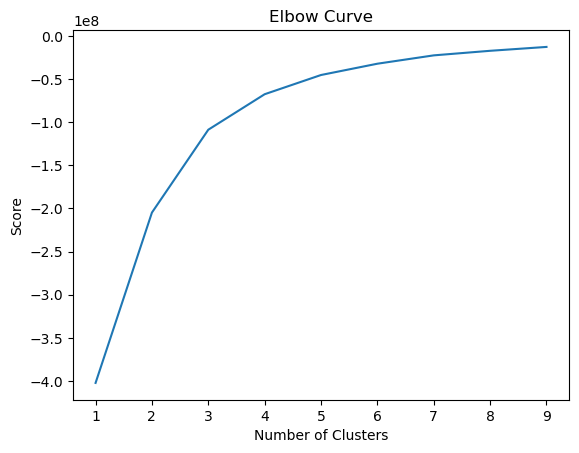

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Based on the graph above, the curve starts to really flatten out at 4 clusters. It is still increasing from 4 to 5 and slightly from 5 to 6, but the increases are much smaller. For this reason, I will proceed with 4 clusters.

## 04. k-means clustering

In [33]:
# Normalizing the price variable for proper scaleability
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [34]:
# Create Standard Scaler object 
scaler = StandardScaler()

In [35]:
# Normalize the features in the data set
df2_normalized = scaler.fit_transform(df2)

In [36]:
# Create k-means object for 4 clusters.
kmeans4 = KMeans(n_clusters = 4) 

In [37]:
# Fit the k-means object to the data.
kmeans4.fit(df2_normalized)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [38]:
# Creating a new column with the new clusters attached 
df2['4_clusters'] = kmeans4.fit_predict(df2_normalized)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
df2.head()

,price,accommodates,beds,review_scores_rating,4_clusters
0,136.0,3,2.0,4.99,2
1,179.0,3,1.0,4.85,1
2,84.0,3,1.0,4.85,1
3,65.0,2,1.0,4.87,1
4,111.0,2,1.0,4.95,1


In [40]:
df2['4_clusters'].value_counts()

1    2144
2    1795
0    1330
3      57
Name: 4_clusters, dtype: int64

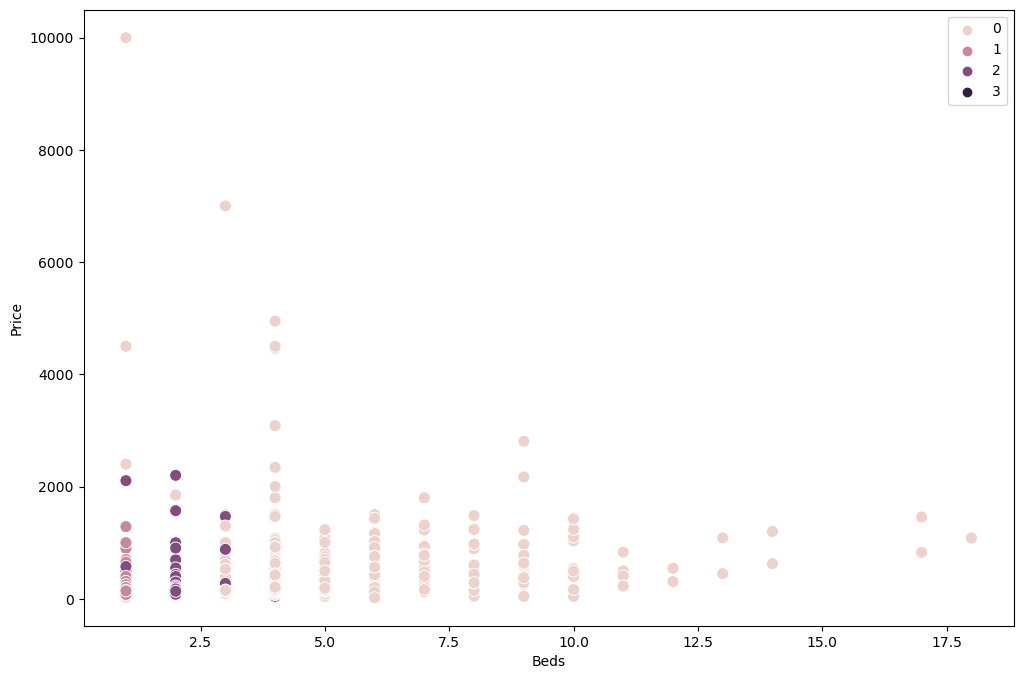

In [41]:
# Plot the clusters for the 'price' and 'beds' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['beds'], y=df2['price'], hue=kmeans4.labels_, s=75) 

plt.xlabel('Beds') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

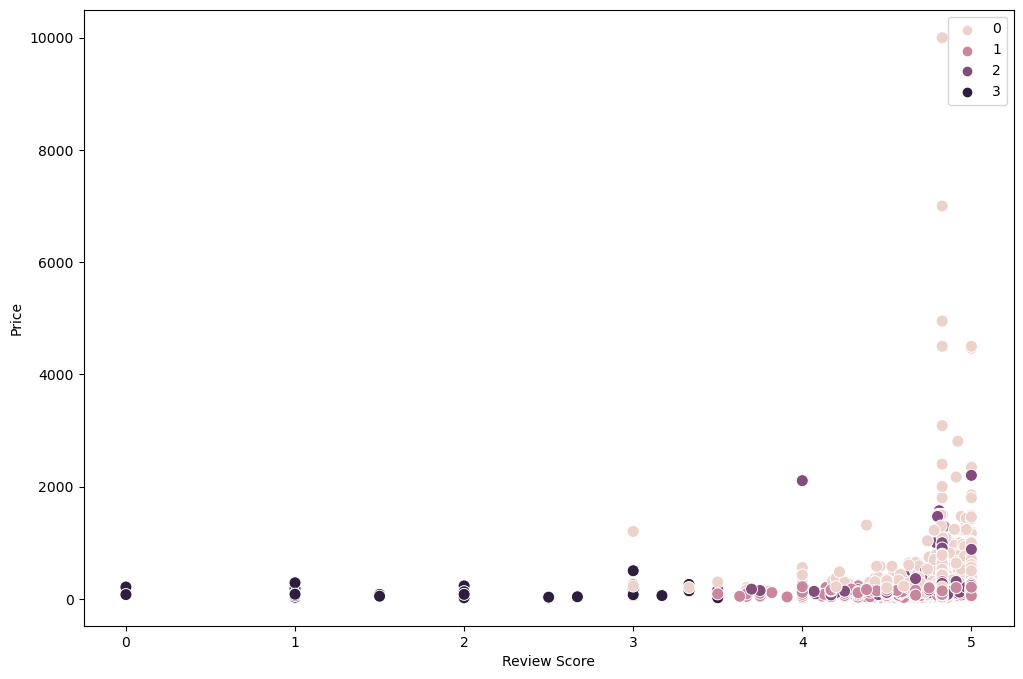

In [42]:
# Plot the clusters for the 'price' and 'beds' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['review_scores_rating'], y=df2['price'], hue=kmeans4.labels_, s=75) 

plt.xlabel('Review Score') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Revised Answer: 
### After normalizing the price variable, the cluster behaves much differently. In the beds graph, I can see that cluster 0 has a higher average price and also a higher average number of beds. The clustering this time around has grouped the listings in a way that makes more sense and also sheds light on a pricing trend. Clusters 1 and 2 have lower average prices as well as lower average bed counts. Looking at the data this way, I can say that a certain degree, as the listings increase in the number of beds they have, the price will likely be higher. 
### For the review scores graph, I am interpreting similar results. Cluster 3 has the lowest review scores and also the almost the lowest average price. Cluster 0, again, has the highest prices of listings, but the unsupervised machine learning has also grouped these with the highest average review scores. This graph contains the same actual data points, but the clusters done by normalizing the price helps reveal insight into the listings with higher prices and review scores. 


##### PREVIOUS ANSWER: 
##### The clustering that was created by the machine learning makes sense for the reivew scores graph, but does not make sense for the beds graph. When looking at the 'beds vs price' graph, even with the different clusters of data, I am still not able to determine a relationship or reasoning behind the pricing of the listings. Each different color of the cluster has a similar distribution across the nubmer of beds and the price of the listing. There are cheap listings with beds ranging all the way up to 12, and there are expensive listings that cover the same spread. 
##### With the 'review scores vs price' graph, the clusters make a lot more sense and help interpret the data. This is the type of results we are looking for when running these types of ML analyses. The black and dark purple clusters start moving toward the higher price range, and their review scores reflect an increase as well. Especially with the black (#3), we see that almost all of the reviews fall around the 4.8-5.0 scores. 

In [43]:
df2.groupby('4_clusters').agg({'price':['mean', 'median'], 
                         'beds':['mean', 'median'], 
                         'review_scores_rating':['mean', 'median']})

price             beds        review_scores_rating       
                  mean median      mean median                 mean median
4_clusters                                                                
0           361.101504  257.0  4.159398    4.0             4.867313   4.91
1           115.441698  100.0  1.096082    1.0             4.843778   4.88
2           174.508078  147.0  2.107521    2.0             4.863922   4.90
3           117.175439   99.0  1.824561    1.0             2.102281   2.00

In [44]:
df2['4_clusters'].value_counts()

1    2144
2    1795
0    1330
3      57
Name: 4_clusters, dtype: int64

### The results from this unsupervised machine learning analysis using clustering could be helpful down the road. I was able to identify a distinct different in the groups of listings for the review scores. Since success as an Airbnb  host is so heavily dependent on reviews left by guests, we could offer some suggestions as we summarize our analysis. Often times, the higher the price of the listing, the nicer the unit most likely is. By seeing that lower-priced units can lead to lower review scores, I would suggest that if you are listing a lower-price unit, that you do everything you can to make the guests experience unique and memorable. If you don't have the nicest furniture, that's OK! Try and make up for it with detailed guide-books or fun/free amenities in the unit. 
### Since the clusting reiterated that the price vs beds relationship does not matter as much, we can choose to ignore this later in our conclusion. I am discovering from all the graphs and relationships between variables that price is determined by a lot more than just the number of beds, location or accommodation amount. This makes sense because with our data set, we don't have information about amenities or the age of the unit or photos of how it has been decorated or designed. These can all be huge factors when determining how much to price the listing and how well it does in terms of review scores. 